# Case Study: How Does a Bike-Share Navigate Speedy Success?


Analysis for a bike sharing company on how casual riders and annual members use Cyclistic bikes differently. From these insights,developing a new marketing strategy to convert casual riders into annual members. 

Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


Loading files

In [3]:
case_1 = pd.read_csv("D:/Data Science Projects/Case Stud/202110-divvy-tripdata.csv")
case_2 = pd.read_csv("D:/Data Science Projects/Case Stud/202111-divvy-tripdata.csv")
case_3 = pd.read_csv("D:/Data Science Projects/Case Stud/202112-divvy-tripdata.csv")
case_4 = pd.read_csv("D:/Data Science Projects/Case Stud/202201-divvy-tripdata.csv")
case_5 = pd.read_csv("D:/Data Science Projects/Case Stud/202202-divvy-tripdata.csv")
case_6 = pd.read_csv("D:/Data Science Projects/Case Stud/202203-divvy-tripdata.csv")
case_7 = pd.read_csv("D:/Data Science Projects/Case Stud/202204-divvy-tripdata.csv")
case_8 = pd.read_csv("D:/Data Science Projects/Case Stud/202205-divvy-tripdata.csv")
case_9 = pd.read_csv("D:/Data Science Projects/Case Stud/202206-divvy-tripdata.csv")
case_10 = pd.read_csv("D:/Data Science Projects/Case Stud/202207-divvy-tripdata.csv")
case_11 = pd.read_csv("D:/Data Science Projects/Case Stud/202208-divvy-tripdata.csv")
case_12 = pd.read_csv("D:/Data Science Projects/Case Stud/202209-divvy-publictripdata.csv")

Merging all the dataset

In [4]:
all_dfs = [case_1, case_2, case_3, case_4, case_5, case_6, case_7, case_8, case_9, case_10, case_11, case_12]
case_file = pd.concat(all_dfs)
df = case_file

In [5]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,41.889186,-87.638495,41.89,-87.63,member
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.93,-87.71,member
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.94,-87.72,member
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,NaN,NaN,NaN,NaN,41.920000,-87.690000,41.92,-87.69,member
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,NaN,NaN,NaN,NaN,41.890000,-87.710000,41.89,-87.69,member


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5828235 entries, 0 to 701338
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 622.5+ MB


# Arranging and  Cleaning Data

In [7]:
df['start_time'] = pd.to_datetime(df['started_at'])
df['end_time'] = pd.to_datetime(df['ended_at'])

In [9]:
#Running Time

df['running_time'] = df['end_time'] - df['start_time']
df['running_time']

0        0 days 00:03:08
1        0 days 00:01:37
2        0 days 00:07:47
3        0 days 00:01:15
4        0 days 00:08:16
               ...      
701334   0 days 00:19:46
701335   0 days 00:13:46
701336   0 days 00:11:18
701337   0 days 00:10:14
701338   0 days 00:10:57
Name: running_time, Length: 5828235, dtype: timedelta64[ns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5828235 entries, 0 to 701338
Data columns (total 16 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          object         
 3   ended_at            object         
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  start_time          datetime64[ns] 
 14  end_time            datetime64[ns] 
 15  running_time        timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), object(9), timedelta64[ns](1)
memory usage: 755.9+ MB


-->Getting Date

In [11]:
df["start_date1"] = [i.split(" ")[0] for i in df["started_at"]]
df["start_date1"]

0         2021-10-22
1         2021-10-21
2         2021-10-16
3         2021-10-16
4         2021-10-20
             ...    
701334    2022-09-05
701335    2022-09-30
701336    2022-09-04
701337    2022-09-28
701338    2022-09-01
Name: start_date1, Length: 5828235, dtype: object

In [12]:
df["start_date1"] = pd.to_datetime(df["start_date1"])

In [13]:
df['week_day'] = df["start_date1"].apply(lambda x: x.weekday())
df['week_day'].unique()

array([4, 3, 5, 2, 6, 1, 0], dtype=int64)

 -->Converting weekday values into weekday

In [14]:

dict1 = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
df['week_day'] = df['week_day'].apply(lambda y: dict1[y])
df['week_day']

0          Thursday
1         Wednesday
2            Friday
3            Friday
4           Tuesday
            ...    
701334       Sunday
701335     Thursday
701336     Saturday
701337      Tuesday
701338    Wednesday
Name: week_day, Length: 5828235, dtype: object

In [15]:
# To sort the dataframe by start date in ascending order
df.sort_values(by=['started_at'], inplace=True, ascending=True)

In [17]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    895032
start_station_id      895032
end_station_name      958227
end_station_id        958227
start_lat                  0
start_lng                  0
end_lat                 5844
end_lng                 5844
member_casual              0
start_time                 0
end_time                   0
running_time               0
start_date1                0
week_day                   0
dtype: int64

In [20]:
df = df.dropna()
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,end_time,running_time,start_date1,week_day
271143,ABA2BDC3595FC3E9,classic_bike,2021-10-01 00:00:09,2021-10-01 00:10:12,Morgan St & Lake St,TA1306000015,Noble St & Milwaukee Ave,13290,41.885483,-87.652305,41.900680,-87.662600,casual,2021-10-01 00:00:09,2021-10-01 00:10:12,0 days 00:10:03,2021-10-01,Thursday
117528,0BE9C131A5705D92,classic_bike,2021-10-01 00:00:16,2021-10-01 00:05:29,Damen Ave & Cortland St,13133,Winchester Ave & Elston Ave,KA1504000140,41.915983,-87.677335,41.924091,-87.676460,casual,2021-10-01 00:00:16,2021-10-01 00:05:29,0 days 00:05:13,2021-10-01,Thursday
341788,74483AC18C8C6B90,classic_bike,2021-10-01 00:00:18,2021-10-01 00:08:52,Halsted St & Roscoe St,TA1309000025,Greenview Ave & Diversey Pkwy,13294,41.943670,-87.648950,41.932590,-87.665936,casual,2021-10-01 00:00:18,2021-10-01 00:08:52,0 days 00:08:34,2021-10-01,Thursday
200504,F8DBF095F01E1B68,classic_bike,2021-10-01 00:02:22,2021-10-01 00:06:40,Pine Grove Ave & Irving Park Rd,TA1308000022,Clarendon Ave & Junior Ter,13389,41.954383,-87.648043,41.961004,-87.649603,member,2021-10-01 00:02:22,2021-10-01 00:06:40,0 days 00:04:18,2021-10-01,Thursday
21249,B0B9EB7622461EF4,classic_bike,2021-10-01 00:02:27,2021-10-01 00:17:56,MLK Jr Dr & 29th St,TA1307000139,Clinton St & Roosevelt Rd,WL-008,41.842052,-87.617000,41.867118,-87.641088,member,2021-10-01 00:02:27,2021-10-01 00:17:56,0 days 00:15:29,2021-10-01,Thursday


In [21]:
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
start_time            0
end_time              0
running_time          0
start_date1           0
week_day              0
dtype: int64

In [22]:
# To calculate euclidean distance between start and end point.
df["x"] = (df["end_lat"] - df["start_lat"])**2
df["y"] = (df["end_lng"] - df["start_lng"])**2
df["distance"] = (df["x"] + df["y"])**(1/2)
df["distance"]


C:\Users\Nidhish\AppData\Local\Temp\ipykernel_13688\1535435036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["x"] = (df["end_lat"] - df["start_lat"])**2
C:\Users\Nidhish\AppData\Local\Temp\ipykernel_13688\1535435036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y"] = (df["end_lng"] - df["start_lng"])**2
C:\Users\Nidhish\AppData\Local\Temp\ipykernel_13688\1535435036.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

271143    0.018356
117528    0.008155
341788    0.020281
200504    0.006802
21249     0.034764
            ...   
287928    0.012556
70962     0.012314
49694     0.014845
292128    0.024989
139222    0.010012
Name: distance, Length: 4474141, dtype: float64

In [23]:
# To extract year and month from start date column
df['year'] = pd.DatetimeIndex(df["start_date1"]).year
df['month'] = pd.DatetimeIndex(df["start_date1"]).month

C:\Users\Nidhish\AppData\Local\Temp\ipykernel_13688\2172908095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.DatetimeIndex(df["start_date1"]).year
C:\Users\Nidhish\AppData\Local\Temp\ipykernel_13688\2172908095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.DatetimeIndex(df["start_date1"]).month


In [25]:
df["ride_len"] = pd.to_timedelta(df["running_time"])

C:\Users\Nidhish\AppData\Local\Temp\ipykernel_13688\3034808188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ride_len"] = pd.to_timedelta(df["running_time"])


In [26]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_time,running_time,start_date1,week_day,x,y,distance,year,month,ride_len
271143,ABA2BDC3595FC3E9,classic_bike,2021-10-01 00:00:09,2021-10-01 00:10:12,Morgan St & Lake St,TA1306000015,Noble St & Milwaukee Ave,13290,41.885483,-87.652305,...,2021-10-01 00:10:12,0 days 00:10:03,2021-10-01,Thursday,0.000231,1.059900e-04,0.018356,2021,10,0 days 00:10:03
117528,0BE9C131A5705D92,classic_bike,2021-10-01 00:00:16,2021-10-01 00:05:29,Damen Ave & Cortland St,13133,Winchester Ave & Elston Ave,KA1504000140,41.915983,-87.677335,...,2021-10-01 00:05:29,0 days 00:05:13,2021-10-01,Thursday,0.000066,7.654943e-07,0.008155,2021,10,0 days 00:05:13
341788,74483AC18C8C6B90,classic_bike,2021-10-01 00:00:18,2021-10-01 00:08:52,Halsted St & Roscoe St,TA1309000025,Greenview Ave & Diversey Pkwy,13294,41.943670,-87.648950,...,2021-10-01 00:08:52,0 days 00:08:34,2021-10-01,Thursday,0.000123,2.885361e-04,0.020281,2021,10,0 days 00:08:34
200504,F8DBF095F01E1B68,classic_bike,2021-10-01 00:02:22,2021-10-01 00:06:40,Pine Grove Ave & Irving Park Rd,TA1308000022,Clarendon Ave & Junior Ter,13389,41.954383,-87.648043,...,2021-10-01 00:06:40,0 days 00:04:18,2021-10-01,Thursday,0.000044,2.433600e-06,0.006802,2021,10,0 days 00:04:18
21249,B0B9EB7622461EF4,classic_bike,2021-10-01 00:02:27,2021-10-01 00:17:56,MLK Jr Dr & 29th St,TA1307000139,Clinton St & Roosevelt Rd,WL-008,41.842052,-87.617000,...,2021-10-01 00:17:56,0 days 00:15:29,2021-10-01,Thursday,0.000628,5.802298e-04,0.034764,2021,10,0 days 00:15:29


# Parameters for data analysis


In [29]:
# Mean time for all types of users

mean_ridelength = df['running_time'].mean()
mean_ridelength

Timedelta('0 days 00:17:30.354210562')

In [32]:
# Calculate the max ride_length of all types of users
max_ride_length = df["ride_len"].max()
max_ride_length

Timedelta('28 days 06:25:01')

In [36]:
# To calculate mean ride length for member
mean_ride_length_member = df[df["member_casual"] == "member"]
mean_ride_length_member = mean_ride_length_member["ride_len"].mean()
mean_ride_length_member



Timedelta('0 days 00:12:28.949272646')

In [34]:
# To calculate mean ride length for casual riders
mean_ride_length_casual = df[df["member_casual"] == "casual"]
mean_ride_length_casual = mean_ride_length_casual["ride_len"].mean()
mean_ride_length_casual

Timedelta('0 days 00:24:55.652959204')

In [37]:
# To calculate max ride length for member
max_ride_length_member = df[df["member_casual"] == "member"]
max_ride_length_member = max_ride_length_member["ride_len"].max()
max_ride_length_member

Timedelta('1 days 00:52:55')

In [38]:
# To calculate max ride length for casual riders
max_ride_length_casual = df[df["member_casual"] == "casual"]
max_ride_length_casual = max_ride_length_casual["ride_len"].max()
max_ride_length_casual

Timedelta('28 days 06:25:01')

In [39]:
# Calculate the mode of week_day for all types of users
mode_week_day = df["week_day"].mode()
mode_week_day

0    Friday
Name: week_day, dtype: object

In [40]:
# To calculate mode of week_day for member
mode_week_day_member = df[df["member_casual"] == "member"]
mode_week_day_member = mode_week_day_member["week_day"].mode()
mode_week_day_member

0    Monday
Name: week_day, dtype: object

In [41]:
# To calculate mode of week_day for casual
mode_week_day_casual = df[df["member_casual"] == "casual"]
mode_week_day_casual = mode_week_day_casual["week_day"].mode()
mode_week_day_casual

0    Friday
Name: week_day, dtype: object

In [42]:
# Calculate the number of rides for users by week_day by adding Count of ride_id to Values
dict1 = {"Sunday": 0, "Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday":5, "Saturday": 6}
df['week_day'] = df['week_day'].apply(lambda y: dict1[y])

count_users_week_day = df.groupby('week_day')['ride_id'].count()
count_users_week_day = count_users_week_day.sort_index()
count_users_week_day

C:\Users\Nidhish\AppData\Local\Temp\ipykernel_13688\1471390233.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week_day'] = df['week_day'].apply(lambda y: dict1[y])


week_day
0    583331
1    631349
2    629556
3    637192
4    637055
5    739175
6    616483
Name: ride_id, dtype: int64

In [43]:
# Calculate the number of rides for member by week_day by adding Count of ride_id to Values
count_member_week_day = df[df["member_casual"] == "member"].groupby('week_day')['ride_id'].count()
count_member_week_day

week_day
0    373294
1    428440
2    423238
3    412227
4    377430
5    350991
6    302546
Name: ride_id, dtype: int64

In [44]:
# Calculate the number of rides for casual by week_day by adding Count of ride_id to Values
count_casual_week_day = df[df["member_casual"] == "casual"].groupby('week_day')['ride_id'].count()
count_casual_week_day

week_day
0    210037
1    202909
2    206318
3    224965
4    259625
5    388184
6    313937
Name: ride_id, dtype: int64

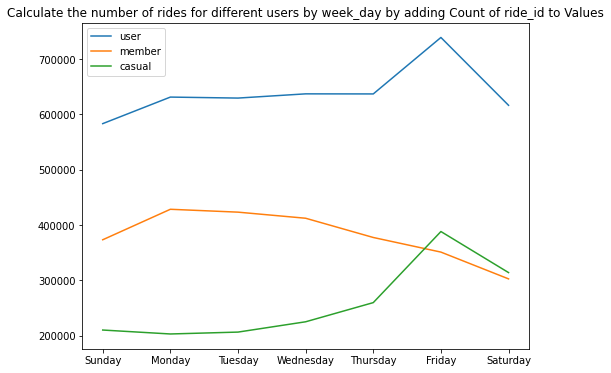

In [45]:
# To plot graph of Weekday Vs Number Of Rides
plt.figure(figsize = (8,6))
plt.plot(count_users_week_day.index, count_users_week_day.values)
plt.plot(count_member_week_day.index, count_member_week_day.values)
plt.plot(count_casual_week_day.index, count_casual_week_day.values)
plt.title("Calculate the number of rides for different users by week_day by adding Count of ride_id to Values")
plt.legend(["user", "member", "casual"])
labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
plt.xticks(count_casual_week_day.index, labels)
plt.show()

In [46]:
# Calculate the average ride_length for users by week_day
user_avg_ride_len_week_day = df.groupby("week_day")['ride_len'].mean(numeric_only=False)
user_avg_ride_len_week_day

week_day
0   0 days 00:16:59.170438396
1   0 days 00:15:09.813136632
2   0 days 00:15:02.346232900
3   0 days 00:15:34.146527263
4   0 days 00:16:40.298415364
5   0 days 00:21:11.360282747
6   0 days 00:21:21.784720746
Name: ride_len, dtype: timedelta64[ns]

In [47]:
# Calculate the average ride_length for members by week_day
member_avg_ride_len_week_day = df[df["member_casual"] == "member"].groupby('week_day')['ride_len'].mean(numeric_only=False)
member_avg_ride_len_week_day

week_day
0   0 days 00:12:03.539502376
1   0 days 00:11:49.080902810
2   0 days 00:11:52.658749923
3   0 days 00:12:01.404136555
4   0 days 00:12:12.488638952
5   0 days 00:14:03.024710035
6   0 days 00:13:56.453326105
Name: ride_len, dtype: timedelta64[ns]

In [50]:
# Calculate the average ride_length for casuals by week_day
casual_avg_ride_len_week_day = df[df["member_casual"] == "casual"].groupby('week_day')['ride_len'].mean(numeric_only=False)
casual_avg_ride_len_week_day

week_day
0   0 days 00:25:44.588601056
1   0 days 00:22:13.656920097
2   0 days 00:21:31.468611560
3   0 days 00:22:03.976756384
4   0 days 00:23:09.627038998
5   0 days 00:27:38.655820435
6   0 days 00:28:30.957555178
Name: ride_len, dtype: timedelta64[ns]

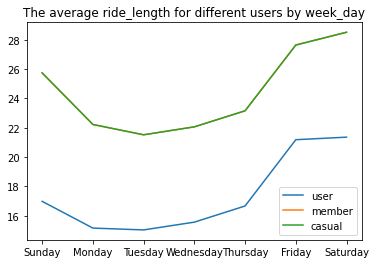

In [53]:

# To plot graph of Weekday Vs Average ride length
plt.plot(user_avg_ride_len_week_day/pd.Timedelta(minutes=1))
plt.plot(member_avg_ride_len_week_day/pd.Timedelta(minutes=1))
plt.plot(casual_avg_ride_len_week_day/pd.Timedelta(minutes=1))
plt.title("The average ride_length for different users by week_day")
plt.legend(["user", "member", "casual"])
labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
plt.xticks(user_avg_ride_len_week_day.index, labels)
plt.show()

Dropping the columns not required

In [54]:
df1 = df[["ride_id", "rideable_type", "ride_len", "week_day", "distance", "year", "month", "member_casual"]]

In [55]:
df1.head()

,ride_id,rideable_type,ride_len,week_day,distance,year,month,member_casual
271143,ABA2BDC3595FC3E9,classic_bike,0 days 00:10:03,4,0.018356,2021,10,casual
117528,0BE9C131A5705D92,classic_bike,0 days 00:05:13,4,0.008155,2021,10,casual
341788,74483AC18C8C6B90,classic_bike,0 days 00:08:34,4,0.020281,2021,10,casual
200504,F8DBF095F01E1B68,classic_bike,0 days 00:04:18,4,0.006802,2021,10,member
21249,B0B9EB7622461EF4,classic_bike,0 days 00:15:29,4,0.034764,2021,10,member


# Data Analysis

In [56]:
# To check the number of users in each type over past 12 months
member_type = df1["member_casual"].value_counts()
member_type

member    2668166
casual    1805975
Name: member_casual, dtype: int64

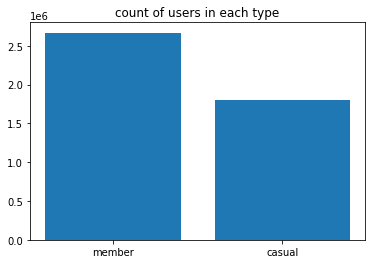

In [57]:
# To plot the count plot of users in each type
plt.title("count of users in each type")
plt.bar(member_type.index, member_type.values)
plt.show()

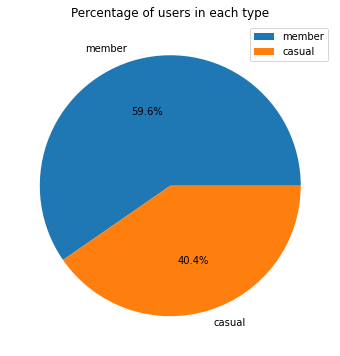

In [58]:
# To plot the pie chart of users in each type
plt.figure(figsize = (8,6))
plt.pie(member_type.values, labels = member_type.index, autopct='%1.1f%%')
plt.title("Percentage of users in each type")
plt.legend(member_type.index)
plt.show()

In [59]:
# To check the number of users over years
users_over_year = df1.groupby('year')['member_casual'].value_counts()
users_over_year

year  member_casual
2021  member            606076
      casual            304171
2022  member           2062090
      casual           1501804
Name: member_casual, dtype: int64

In [60]:
# To segregate the number of users into member or casual riders over the years
list_year = []
list_x = []
list_y = list(users_over_year.values)
for i, j in users_over_year.index:
  list_x.append(j)
  list_year.append(str(i))

C:\Users\Nidhish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Member and Casual Riders over the years')

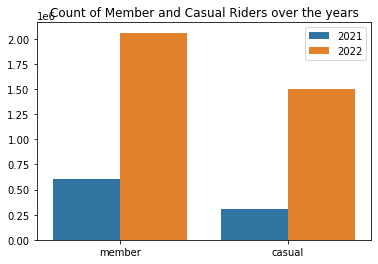

In [61]:
sns.barplot(list_x, list_y, hue = list_year)
plt.title("Count of Member and Casual Riders over the years")

In [62]:
# To check the number of users over months
users_over_month = df1.groupby('month')['member_casual'].value_counts()
users_over_month

month  member_casual
1      member            67523
       casual            12605
2      member            74034
       casual            15144
3      member           148827
       casual            67156
4      member           180663
       casual            91897
5      member           282299
       casual           220246
6      member           328282
       casual           292068
7      member           331002
       casual           311678
8      member           335230
       casual           270095
9      member           314230
       casual           220915
10     member           288855
       casual           189117
11     member           185926
       casual            69978
12     member           131295
       casual            45076
Name: member_casual, dtype: int64

In [63]:
# To segregate the number of users into member or casual riders over the months
list_month = []
list_x = []
list_y = list(users_over_month.values)
for i, j in users_over_month.index:
  list_x.append(j)
  list_month.append(str(i))

C:\Users\Nidhish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Member and Casual Riders over the months')

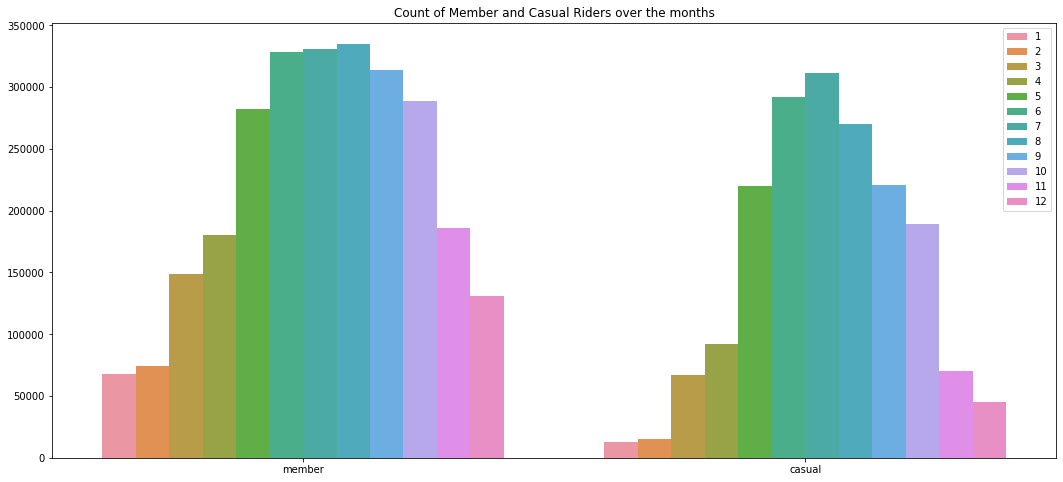

In [64]:
# Plot count of Member and Casual Riders over the months
plt.figure(figsize = (18,8))
sns.barplot(list_x, list_y, hue = list_month)
plt.title("Count of Member and Casual Riders over the months")

In [65]:
# To check the number of users for a particulat rideable_type
ride_type = df1.groupby("member_casual")["rideable_type"].value_counts()
ride_type

member_casual  rideable_type
casual         classic_bike      938348
               electric_bike     677699
               docked_bike       189928
member         classic_bike     1797139
               electric_bike     871027
Name: rideable_type, dtype: int64

In [66]:
# To segregate the number of users into member or casual riders based on ride type
list_member = []
list_x = []
list_y = list(ride_type.values)
for i, j in ride_type.index:
  list_x.append(j)
  list_member.append(str(i))

C:\Users\Nidhish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Member and Casual Riders over the months')

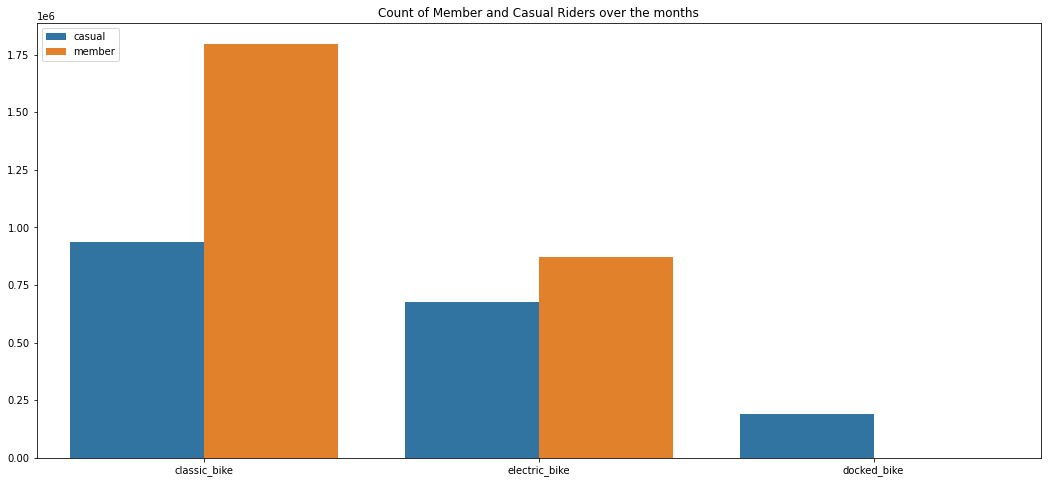

In [67]:
# To plot number of users into member or casual riders based on ride type
plt.figure(figsize = (18,8))
sns.barplot(list_x, list_y, hue = list_member)
plt.title("Count of Member and Casual Riders over the months")